**Simple Linear Regression Using (OLS) Ordinary Least Squares method. Develop a regression model to predict Salary based on Percentage in Grade 10.** 

**1.Import the MBA Salary dataset**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving MBA Salary.csv to MBA Salary.csv


In [ ]:
import pandas as pd 
df=pd.read_csv("/content/MBA Salary.csv")
df.head(3)

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [ ]:
df.shape

(50, 3)

**2.Creating feature set X and the outcome variable Y. The statsmodel library is used for building statistical models. OLS API in statsmodel.api is used to estimate the parameters of simple linear regression. It takes two parameters Y and X. IN this data Y is Salary and X is Percentage in Grade 10. The OLS model estimates only the coefficient of X (Beta 1 or slope). To estimate Beta 0, a constant term of 1 needs to be added as a seperate column. This parameter is the intercept term.**

In [ ]:
import statsmodels.api as sm
X=sm.add_constant(df['Percentage in Grade 10'])
X.head(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


**3. Create outcome Variable Y**

In [ ]:
Y=df['Salary']
Y.head()

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

**4. Split dataset into training and validation sets. Use 80% for training and 20% for validating**

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,Y,train_size=0.8,random_state=100)

***5. Fit the model***

In [ ]:
lm=sm.OLS(train_y,train_X).fit()

**6. Print the estimated parameters**

In [ ]:
print(lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


**7. Model Diagnostics - Printing the coefficient of determination R-Square**

In [ ]:
print(lm.summary2())

                          Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2020-10-01 04:04      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grad

**8. Model Diagnostics - Residual Analysis - variance of the residual has to be constant across different values of the predicted value (Y') - a property known as homoscedasticity. A non-constant variance of the residuals is known as heteroscedasticity - not desired. If there is heteroscedasticity, a residual plot between standardised residual values and standardised predicted values, will be funnel shaped. To standardize, subtract from mean and divide by standard deviation**

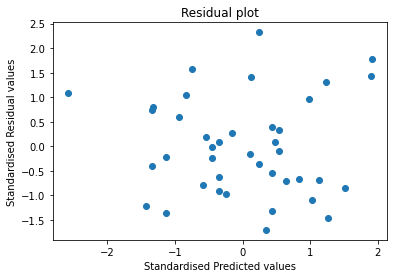

In [ ]:
import matplotlib.pyplot as plt
def get_std_values(vals):
  return(vals-vals.mean())/vals.std()
x_axis=get_std_values(lm.fittedvalues)
y_axis=get_std_values(lm.resid)
plt.scatter(x_axis,y_axis)
plt.xlabel("Standardised Predicted values")
plt.ylabel("Standardised Residual values")
plt.title("Residual plot")
plt.show()

**9. Model Diagnostics - Oulier Detection. Outliers are observations whose values show a large deviation from the mean value. Their presence can have a significant influence on the values of the regression coefficients. Hence we use Z-Score to identify their existence in the data. Any obervation with an Z-Score of more than 3.0 is an outlier.**

In [ ]:
from scipy.stats import zscore
df['z_score_salary']=zscore(df.Salary)
#df.head()
df[(df.z_score_salary>3.0)|(df.z_score_salary<-3)]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


**10. Model Diagnostics - Finding highly influential Observations using Cook's distance. This distance measures how much the predicted value of the dependent variable changes for all observations on the sample when a particular observation is removed from the sample while estimating the regression parameters. get_influence() returns the influence of each observations and cook_distance variable provides Cook's distance measures. An observation with Cook's distance of more than 1 is highly influential.**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df_influence=

**11. Making predictions on validation set and measuring accuracy - R-Squared and RMSE**

In [ ]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
pred_y=lm.predict(test_X)
print('R2 Score=',np.abs(r2_score(test_y,pred_y)))
print('RMSE=',np.sqrt(mean_squared_error(test_y,pred_y)))

R2 Score= 0.156645849742304
RMSE= 73458.04348346895
